<a href="https://colab.research.google.com/github/ferngonzalezp/Langevin-GAN/blob/master/GAN_turbo2d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
! pip install pytorch-lightning

     |████████████████████████████████| 204kB 2.8MB/s 
     |████████████████████████████████| 829kB 8.8MB/s 
     |████████████████████████████████| 61kB 6.6MB/s 
  Created wheel for future: filename=future-0.18.2-cp36-none-any.whl size=491057 sha256=a59f72dfa327e5af6a36048157b1ca60ce419e1cbc3991d17b7a5649cfd3cf9e
  Stored in directory: /root/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully built future
  Found existing installation: future 0.16.0
    Uninstalling future-0.16.0:
      Successfully uninstalled future-0.16.0
  Found existing installation: tqdm 4.38.0
    Uninstalling tqdm-4.38.0:
      Successfully uninstalled tqdm-4.38.0


In [0]:
import os
from argparse import ArgumentParser
from collections import OrderedDict

import torch
import torch.nn as nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
import numpy as np
import torchvision
import torchvision.transforms as transforms
import pytorch_lightning as pl
import matplotlib.pyplot as plt
from scipy.linalg import sqrtm

# Data Upload

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=1Z5vK6zY3PQc585IHHeB63Vi6pUVqBK2X' # The shareable link

In [6]:
fluff, id = link.split('=')

print (id) # Verify that you have everything after '='

1Z5vK6zY3PQc585IHHeB63Vi6pUVqBK2X


In [7]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('TurboGenPY-master.zip')  

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/__init__.py", line 36, in autodetect
    from google.appengine.api import memcache
ModuleNotFoundError: No module named 'google.appengine'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.locked_file'

During handling of the above exception, another exceptio

In [8]:
!unzip /content/TurboGenPY-master.zip

Archive:  /content/TurboGenPY-master.zip
87ebacc354cbf426783e8bf023ea16bba87814c3
   creating: TurboGenPY-master/
 extracting: TurboGenPY-master/.gitignore  
  inflating: TurboGenPY-master/LICENSE  
  inflating: TurboGenPY-master/README.md  
  inflating: TurboGenPY-master/cbc_spectrum.txt  
  inflating: TurboGenPY-master/cudaturbo.py  
   creating: TurboGenPY-master/docs/
  inflating: TurboGenPY-master/docs/Makefile  
  inflating: TurboGenPY-master/docs/conf.py  
  inflating: TurboGenPY-master/docs/index.rst  
  inflating: TurboGenPY-master/docs/theory.rst  
  inflating: TurboGenPY-master/driver.py  
  inflating: TurboGenPY-master/example.py  
  inflating: TurboGenPY-master/example2d.py  
   creating: TurboGenPY-master/figures/
   creating: TurboGenPY-master/figures/pdf/
  inflating: TurboGenPY-master/figures/pdf/angles.pdf  
   creating: TurboGenPY-master/figures/raster/
  inflating: TurboGenPY-master/figures/raster/angles.png  
   creating: TurboGenPY-master/figures/src/
  inflating:

In [9]:
n_boxes = 300
field = np.zeros((n_boxes*32,3,128,128))

for i in range(n_boxes):
  !python /content/TurboGenPY-master/generate_turbo.py
  u = np.load('/content/u_cbc_128.128.128_10000_modes.npy')
  v = np.load('/content/v_cbc_128.128.128_10000_modes.npy')
  w = np.load('/content/w_cbc_128.128.128_10000_modes.npy')

  for j in range(32):
    field[32*i+j,0,:,:] = u[:,:,4*j]
    field[32*i+j,1,:,:] = v[:,:,4*j]
    field[32*i+j,2,:,:] = w[:,:,4*j]

input spec cbc
I will generate data up to wave number:  711.1111111111111
Orthogonality of k and sigma (divergence in wave space):
-2.0337919716395536e-13
it took me  5.955759525299072 s to generate the isotropic turbulence.
knorm =  11.111111111111109
0.07046224534372193
Integral Error =  0.7993450474380104 %
Mean Error =  4.239635036136826 %
RMS Error =  5.187030831151519 %
<Figure size 700x560 with 1 Axes>
input spec cbc
I will generate data up to wave number:  711.1111111111111
Orthogonality of k and sigma (divergence in wave space):
-2.0337919716395536e-13
it took me  5.523928880691528 s to generate the isotropic turbulence.
knorm =  11.111111111111109
0.07046224534372193
Integral Error =  0.7993450474380104 %
Mean Error =  4.239635036136826 %
RMS Error =  5.187030831151519 %
<Figure size 700x560 with 1 Axes>
input spec cbc
I will generate data up to wave number:  711.1111111111111
Orthogonality of k and sigma (divergence in wave space):
-2.0337919716395536e-13
it took me  5.50363

In [11]:
field = torch.tensor(field,dtype=torch.float32)
torch.save(field,'field.pt')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


In [5]:
!cp /content/field.pt /content/drive/My\ Drive/file.pt

cp: cannot stat '/content/field.pt': No such file or directory


In [0]:
!cp /content/drive/My\ Drive/file.pt /content/field.pt
field = torch.load('field.pt')

In [0]:
class mirror(object):
 def __init__(self):
   super().__init__()
 def __call__(self,field):
    p = torch.rand(1)
    if p < 0.25:
      return torch.flip(field,[0,1])
    elif 0.25 <= p < 0.5:
      return torch.flip(field,[0,2])
    elif 0.5 <= p < 0.75:
      return torch.flip(field,[0,1,2])
    else:
      return field

class transform(object):
  def __init__(self):
    self.transform = torchvision.transforms.Compose([
                    mirror(),
    ])
  def __call__(self,field):
    return self.transform(field)


class mydataset(torch.utils.data.Dataset):
  def __init__(self,field,transform=None):
    self.field = field
    self.transform = transform
  def __len__(self):
    return field.shape[0]
  
  def __getitem__(self,idx):
    if torch.is_tensor(idx):
            idx = idx.tolist()
    sample = self.field[idx,:]
    if self.transform:
        sample = self.transform(sample)
    return sample

In [0]:
dataset = mydataset(field,transform=transform())

# Additional Modules

In [0]:
def stream_vorticity(field):
  b_size = field.shape[0]
  w = np.zeros((b_size,128,128))
  for i in range(b_size):
    w[i,:,:] = np.gradient(field[i,2,:,:].cpu().detach(),axis=0)-np.gradient(field[i,1,:,:].cpu().detach(),axis=1)
  w = torch.tensor(w)
  return w.reshape(b_size,1,128,128)

In [0]:
def cov(y):
  mu = torch.mean(y,dim=(0))
  covu = torch.mean(torch.matmul(y[:,0],y[:,0].transpose(-1,-2)),dim=0)-torch.matmul(mu[0],mu[0].transpose(-1,-2))
  covv = torch.mean(torch.matmul(y[:,1],y[:,1].transpose(-1,-2)),dim=0)-torch.matmul(mu[1],mu[1].transpose(-1,-2))
  covw = torch.mean(torch.matmul(y[:,2],y[:,2].transpose(-1,-2)),dim=0)-torch.matmul(mu[2],mu[2].transpose(-1,-2))
  sigma = torch.cat((covu.unsqueeze(0),covv.unsqueeze(0),covw.unsqueeze(0)))
  return sigma

In [22]:
cov(field[:100]).shape

torch.Size([3, 128, 128])

In [0]:
def stat_constraint1(x,y):
  sigmax = (cov(x))
  sigmay = (cov(y))
  return torch.norm(sigmax-sigmay)

In [0]:
def spec(field,lx=9*np.pi/50,smooth=True):
  n = field.shape[2]
  uh = torch.rfft(field[:,0],1,onesided=False)/n
  vh = torch.rfft(field[:,1],1,onesided=False)/n
  wh = torch.rfft(field[:,2],1,onesided=False)/n
  uspec = 0.5 * (uh[:,:,:,0]**2+uh[:,:,:,1]**2)
  vspec = 0.5 * (vh[:,:,:,0]**2+vh[:,:,:,1]**2)
  wspec = 0.5 * (wh[:,:,:,0]**2+wh[:,:,:,1]**2)
  uspec = uspec.reshape(uspec.shape[0],1,n,n)
  vspec = vspec.reshape(vspec.shape[0],1,n,n)
  wspec = wspec.reshape(wspec.shape[0],1,n,n)
  k = 2.0 * np.pi / lx
  wave_numbers = k*np.arange(0,n)
  spec = torch.cat((uspec,vspec,wspec),dim=1)
  spec[:,:,:,int(n/2+1):,] = 0

  if smooth == True:
    window = torch.ones(3,3,5,5).type_as(spec)/ 5
    specsmooth = nn.functional.conv2d(spec,window,padding=2)
    #specsmooth[:,:,:,0:4] = spec[:,:,:,0:4]
    spec = specsmooth

  return wave_numbers, spec

In [0]:
def stat_cosntraint2(x,y):
  _, specx = spec(x)
  _, specy = spec(y)
  return torch.norm(specx-specy)

In [0]:
def score(x,y):
  covx = cov(x)
  covy = cov(y)
  mux = torch.mean(x,dim=0)
  muy = torch.mean(y,dim=0)
  term1 = torch.norm(mux-muy)
  covmean = np.zeros((3,128,128))
  for i in range(3):
    covmean[i] = sqrtm(torch.abs(torch.matmul(covx[i],covy[i])).cpu().detach())
  covmean = torch.tensor(covmean).to(x.device)
  term2 = (torch.diagonal(covx+covy-covmean, dim1=-2, dim2=-1).sum(-1).view(3,1))
  return torch.mean(term1 + term2)

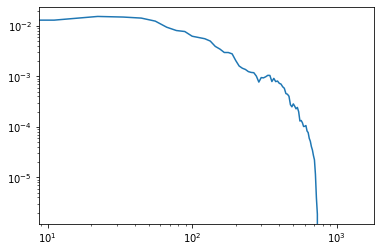

In [15]:
k,s = spec(field,lx=9*np.pi/50)
plt.xscale('log')
plt.yscale('log')
plt.plot(k,s[120,2,58,:])

In [0]:
def calc_gradient_penalty(netD, real_data, generated_data):
    # GP strength
    LAMBDA = 10

    b_size = real_data.size()[0]

    # Calculate interpolation
    alpha = torch.rand(b_size,1,1,1).to(real_data.device)
    alpha = alpha.expand_as(real_data)
    aplha = alpha.type_as(real_data)

    interpolated = alpha * real_data + (1 - alpha) * generated_data
    interpolated = torch.autograd.Variable(interpolated, requires_grad=True)

    # Calculate probability of interpolated examples
    prob_interpolated = netD(interpolated)

    # Calculate gradients of probabilities with respect to examples
    gradients = torch.autograd.grad(outputs=prob_interpolated, inputs=interpolated,
                           grad_outputs=torch.ones(prob_interpolated.size()).cuda(),
                           create_graph=True, retain_graph=True)[0]

    # Gradients have shape (batch_size, num_channels, img_width, img_height),
    # so flatten to easily take norm per example in batch
    gradients = gradients.view(b_size, -1)

    # Derivatives of the gradient close to 0 can cause problems because of
    # the square root, so manually calculate norm and add epsilon
    gradients_norm = torch.sqrt(torch.sum(gradients ** 2, dim=1) + 1e-12)

    # Return gradient penalty
    return LAMBDA * ((gradients_norm - 1) ** 2).mean()

In [0]:
# custom weights initialization called on netG and netD
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Linear') != -1:
        nn.init.kaiming_normal_(m.weight.data,0.2,mode='fan_out')
    elif classname.find('Conv') != -1:
        nn.init.kaiming_normal_(m.weight.data,0.2,mode='fan_out')

#Generator

In [0]:
class PixelNormLayer(nn.Module):
    """
    Pixelwise feature vector normalization.
    """
    def __init__(self, eps=1e-8):
        super(PixelNormLayer, self).__init__()
        self.eps = eps
    
    def forward(self, x):
        return x / torch.sqrt(torch.mean(x ** 2, dim=1, keepdim=True) + 1e-8)

    def __repr__(self):
        return self.__class__.__name__ + '(eps = %s)' % (self.eps)

In [0]:
class Generator(nn.Module):

  def __init__(self,latent_dim):
    super(Generator, self).__init__()

    self.fc = nn.Linear(latent_dim,latent_dim*4*4,bias=False)

    def block(in_feats,out_feats):
      layers = [nn.UpsamplingNearest2d(scale_factor=2)]
      layers.append(nn.Conv2d(in_feats,out_feats,3,padding=1))
      layers.append(nn.LeakyReLU(0.2,True))
      layers.append(PixelNormLayer())
      #layers.append(nn.BatchNorm2d(out_feats)),
      layers.append(nn.Conv2d(out_feats,out_feats,3,padding=1))
      layers.append(nn.LeakyReLU(0.2,True))
      layers.append(PixelNormLayer())
      #layers.append(nn.BatchNorm2d(out_feats)),
      return layers

    self.main = nn.Sequential(
        nn.LeakyReLU(0.2,True),
        PixelNormLayer(),
        # nn.BatchNorm2d(192),
        nn.Conv2d(192,192,3,padding=1),
        # size 4 x 4 x 192
        *block(192,192),
        # size 8 x 8 x 192
        *block(192,192),
        # size 16 x 16 x 192
        *block(192,96),
        # size 32 x 32 x 96
        *block(96,48),
        # size 64 x 64 x 48
        *block(48,3),
        #size 128 x 128 x 3
        nn.Conv2d(3,3,1)
    )

  def forward(self,z):
    nz = z.shape[1]
    b_size = z.shape[0]
    z = self.fc(z)
    z = z.reshape(b_size,nz,4,4)
    return self.main(z)

In [0]:
z = torch.randn(50,192)

In [20]:
netG = Generator(192)
print(netG)

Generator(
  (fc): Linear(in_features=192, out_features=3072, bias=False)
  (main): Sequential(
    (0): LeakyReLU(negative_slope=0.2, inplace=True)
    (1): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Conv2d(192, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): UpsamplingNearest2d(scale_factor=2.0, mode=nearest)
    (4): Conv2d(192, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): LeakyReLU(negative_slope=0.2, inplace=True)
    (6): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Conv2d(192, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): LeakyReLU(negative_slope=0.2, inplace=True)
    (9): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): UpsamplingNearest2d(scale_factor=2.0, mode=nearest)
    (11): Conv2d(192, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): LeakyReLU(negative_slope=0.2, inp

In [21]:
netG.apply(weights_init)

Generator(
  (fc): Linear(in_features=192, out_features=3072, bias=False)
  (main): Sequential(
    (0): LeakyReLU(negative_slope=0.2, inplace=True)
    (1): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Conv2d(192, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): UpsamplingNearest2d(scale_factor=2.0, mode=nearest)
    (4): Conv2d(192, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): LeakyReLU(negative_slope=0.2, inplace=True)
    (6): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Conv2d(192, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): LeakyReLU(negative_slope=0.2, inplace=True)
    (9): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): UpsamplingNearest2d(scale_factor=2.0, mode=nearest)
    (11): Conv2d(192, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): LeakyReLU(negative_slope=0.2, inp

In [0]:
fake = netG(z)

In [23]:
fake.mean(), fake.std()

(tensor(0.2600, grad_fn=<MeanBackward0>),
 tensor(1.3797, grad_fn=<StdBackward0>))

# Discriminator

In [0]:
class Discriminator(nn.Module):

  def __init__(self):
    super(Discriminator,self).__init__()

    def block(in_feats,out_feats):
      layers = [nn.ConvTranspose2d(in_feats,in_feats,3,padding=1)]
      layers.append(nn.LeakyReLU(0.2,True))
      layers.append(nn.ConvTranspose2d(in_feats,out_feats,3,padding=1))
      layers.append(nn.LeakyReLU(0.2,True))
      layers.append(nn.AvgPool2d(2))
      return layers
    
    self.main = nn.Sequential(
        nn.ConvTranspose2d(4,48,1),
        # 128 x 128 x 48
        *block(48,96),
        # 64 x 64 x 96
        *block(96,192),
        # 32 x 32 x 192
        *block(192,192),
        # 16 x 16 x 192
        *block(192,192),
        # 8 x 8 x 192
        *block(192,192),
        # 4 x 4 x 192
        nn.ConvTranspose2d(192,192,3,padding=1),
        nn.LeakyReLU(0.2,True),
        # 4 x 4 x 192
    )

    self.fc = nn.Sequential(
        nn.Linear(192*4*4,192,bias=False),
        nn.LeakyReLU(0.2,True),
        nn.Linear(192,1,bias=False)
    )

  def forward(self,field):
      b_size = field.shape[0]
      field = self.main(field)
      field = field.reshape(b_size,192*4*4)
      return self.fc(field)


In [50]:
netD = Discriminator()
print(netD)

Discriminator(
  (main): Sequential(
    (0): ConvTranspose2d(4, 48, kernel_size=(1, 1), stride=(1, 1))
    (1): ConvTranspose2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (2): LeakyReLU(negative_slope=0.2, inplace=True)
    (3): ConvTranspose2d(48, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (6): ConvTranspose2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): ConvTranspose2d(96, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): LeakyReLU(negative_slope=0.2, inplace=True)
    (10): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (11): ConvTranspose2d(192, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): LeakyReLU(negative_slope=0.2, inplace=True)
    (13): ConvTranspose2d(192, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14)

In [51]:
netD.apply(weights_init)

Discriminator(
  (main): Sequential(
    (0): ConvTranspose2d(4, 48, kernel_size=(1, 1), stride=(1, 1))
    (1): ConvTranspose2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (2): LeakyReLU(negative_slope=0.2, inplace=True)
    (3): ConvTranspose2d(48, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (6): ConvTranspose2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): ConvTranspose2d(96, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): LeakyReLU(negative_slope=0.2, inplace=True)
    (10): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (11): ConvTranspose2d(192, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): LeakyReLU(negative_slope=0.2, inplace=True)
    (13): ConvTranspose2d(192, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14)

# GAN

In [0]:
class GAN(pl.LightningModule):
  def __init__(self, hparams):
    super(GAN, self).__init__()
    self.hparams = hparams

    # networks
    self.netG = Generator(latent_dim=hparams.latent_dim)
    self.netG.apply(weights_init)
    self.netD = Discriminator()
    self.netD.apply(weights_init)

    self.G_losses = []
    self.D_losses = []
    self.score = []
    self.iters = 0
  
  def forward(self, z):
      return self.netG(z)

  def adversarial_loss(self, y, y_hat):
      return -torch.mean((y)) + torch.mean((y_hat)) 

  def training_step(self, batch, batch_nb, optimizer_idx):

      real_field = batch
      omega = stream_vorticity(real_field).type_as(real_field)
      real_field = torch.cat((real_field,omega),1)
      if self.on_gpu:    
        real_field = real_field.cuda(real_field.device.index)

      if optimizer_idx == 0:
          z = torch.randn(real_field.shape[0],hparams.latent_dim).type_as(real_field)
          if self.on_gpu:
            z = z.cuda(real_field.device.index)
          gen_field = self(z)
          omega = stream_vorticity(gen_field).type_as(gen_field)
          gen_field = torch.cat((gen_field,omega),1)

          grad_penalty = calc_gradient_penalty(self.netD,real_field,gen_field)
          d_loss = self.adversarial_loss(self.netD(real_field),self.netD(gen_field)) + grad_penalty
          fid = score(real_field,gen_field)
          tqdm_dict = {'d_loss': d_loss, 'score': fid}
          self.score.append(fid.item())
          output = OrderedDict({
              'loss': d_loss,
              'progress_bar': tqdm_dict,
              'log': tqdm_dict,
              })
          self.D_losses.append(d_loss.detach())
          self.iters += 1
          return output
      
      if optimizer_idx == 1:
          z = torch.randn(real_field.shape[0],hparams.latent_dim).type_as(real_field)
          gen_field = self(z)
          omega = stream_vorticity(gen_field).type_as(gen_field)
          gen_field = torch.cat((gen_field,omega),1)

          g_loss = -torch.mean(self.netD(gen_field)) + 10*stat_cosntraint2(real_field,gen_field)
          fid = score(real_field,gen_field)
          tqdm_dict = {'g_loss': g_loss,'score': fid}
          self.score.append(fid.item())
          output = OrderedDict({
              'loss': g_loss,
              'progress_bar': tqdm_dict,
              'log': tqdm_dict,
              })
          self.G_losses.append(g_loss.detach())
          self.iters += 1
          return output
      
  def configure_optimizers(self):

      lr = self.hparams.lr
      b1 = self.hparams.b1
      b2 = self.hparams.b2

      opt_g = torch.optim.Adam(self.netG.parameters(), lr=lr, betas=(b1, b2))
      opt_d = torch.optim.Adam(self.netD.parameters(), lr=lr, betas=(b1, b2))
      return [opt_d, opt_g], []
    
  def train_dataloader(self):
        return DataLoader(dataset, batch_size=self.hparams.batch_size,)

# Train

In [0]:
from argparse import Namespace

args = {
    'batch_size': 16,
    'lr': 0.0001,
    'b1': 0.0,
    'b2': 0.99,
    'latent_dim': 192,
    'ncritic': 1,
    'gpus': 1,
}
hparams = Namespace(**args)

In [0]:
gan_model = GAN(hparams)
checkpoint = pl.callbacks.ModelCheckpoint('/content/',monitor='loss')
# most basic trainer, uses good defaults (1 gpu)
trainer = pl.Trainer(gpus=hparams.gpus, max_epochs = 100, checkpoint_callback=checkpoint)    
trainer.fit(gan_model)   

/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/warnings.py:18: UserWarning: Checkpoint directory /content/ exists and is not empty with save_top_k != 0.All files in this directory will be deleted when a checkpoint is saved!
  warnings.warn(*args, **kwargs)
INFO:lightning:GPU available: True, used: True
INFO:lightning:VISIBLE GPUS: 0
INFO:lightning:
   | Name         | Type                | Params
-------------------------------------------------
0  | netG         | Generator           | 2 M   
1  | netG.fc      | Linear              | 589 K 
2  | netG.main    | Sequential          | 1 M   
3  | netG.main.0  | LeakyReLU           | 0     
4  | netG.main.1  | PixelNormLayer      | 0     
5  | netG.main.2  | Conv2d              | 331 K 
6  | netG.main.3  | UpsamplingNearest2d | 0     
7  | netG.main.4  | Conv2d              | 331 K 
8  | netG.main.5  | LeakyReLU           | 0     
9  | netG.main.6  | PixelNormLayer      | 0     
10 | netG.main.7  | Conv2d              

/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/warnings.py:18: RuntimeWarning: Displayed epoch numbers in the progress bar start from "1" until v0.6.x, but will start from "0" in v0.8.0.
  warnings.warn(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/warnings.py:18: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


# Results

In [0]:
num_examples = 1000
z = torch.randn((num_examples,192)).cuda()

In [0]:
gen_field = gan_model(z)

In [0]:
k, s_gen = spec(gen_field)

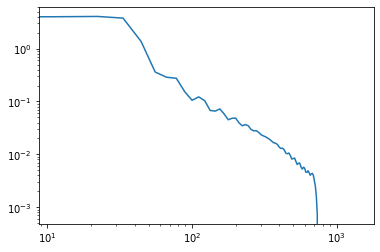

In [84]:
plt.xscale('log')
plt.yscale('log')
plt.plot(k,s_gen[np.random.randint(0,num_examples),0,np.random.randint(0,128),:].cpu().detach())

In [90]:
K = cov(gen_field)
mean = torch.mean(gen_field)
print(mean)

tensor(0.2040, device='cuda:0', grad_fn=<MeanBackward0>)


In [113]:
score(gen_field.cpu(),field)

tensor(77617.6797, grad_fn=<AddBackward0>)